# Singapore Food Waste Analysis and Prediction Report

### 1. Data Load and Overview

The dataset is loaded from a CSV file containing the following columns:

   - Year: Year of observation (2002 to 2023).
   - Total Food Waste (kt): The total amount of food waste (in kilotonnes).
   - Population: Population of the region in thousands.
   - Supermarkets: The number of supermarkets.
   - GDP_per_Capita: Gross Domestic Product per capita.

In [41]:
from google.colab import files
uploaded = files.upload()

Saving FoodWasteRecyleDataWithGDP-Population2002-2023.csv to FoodWasteRecyleDataWithGDP-Population2002-2023 (1).csv


In [42]:
import numpy as np
import pandas as pd

df = pd.read_csv('FoodWasteRecyleDataWithGDP-Population2002-2023.csv')
df.head()

,Year,Waste Type,Total Food Waste (kt),Waste Food Disposed (kt),Total Food Waste Recycled (kt),Recycling Rate (%),Avg Monthly Disposal (kt),Avg Daily Disposal (kt),Non-Retail Food Establishments,Food Shops,Food Stalls,Supermarkets,National Environment Agency Hawker Stalls,Population (000),GDP per Capita (S$)
0,2002,Food waste,526,495,31,5.93,41.25,1.36,1256,9940,13629,207,NaN,4163.7,46832
1,2003,Food waste,548,515,33,6.00,42.92,1.41,1135,10839,14125,212,NaN,4114.8,46499
2,2004,Food waste,531,500,31,5.90,41.67,1.37,1128,10828,13509,237,NaN,4166.7,50968
3,2005,Food waste,532,495,37,6.90,41.25,1.36,1119,11226,13579,257,NaN,4265.8,54750
4,2006,Food waste,543,498,45,8.20,41.50,1.36,1154,11451,13039,255,NaN,4401.4,59379


In [43]:
#import pandas as pd

# Load the data using the provided full path
#file_path = r'FoodWasteRecyleDataWithGDP-Population2002-2023.csv'
#df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Year,Waste Type,Total Food Waste (kt),Waste Food Disposed (kt),Total Food Waste Recycled (kt),Recycling Rate (%),Avg Monthly Disposal (kt),Avg Daily Disposal (kt),Non-Retail Food Establishments,Food Shops,Food Stalls,Supermarkets,National Environment Agency Hawker Stalls,Population (000),GDP per Capita (S$)
0,2002,Food waste,526,495,31,5.93,41.25,1.36,1256,9940,13629,207,NaN,4163.7,46832
1,2003,Food waste,548,515,33,6.00,42.92,1.41,1135,10839,14125,212,NaN,4114.8,46499
2,2004,Food waste,531,500,31,5.90,41.67,1.37,1128,10828,13509,237,NaN,4166.7,50968
3,2005,Food waste,532,495,37,6.90,41.25,1.36,1119,11226,13579,257,NaN,4265.8,54750
4,2006,Food waste,543,498,45,8.20,41.50,1.36,1154,11451,13039,255,NaN,4401.4,59379


### 2. Exploratory Data Analysis (EDA)

#### 2.1 Data Overview and summary statistics

In [44]:
print(df.shape)
print(df.info())

print(df.describe())

(22, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       22 non-null     int64  
 1   Waste Type                                 22 non-null     object 
 2   Total Food Waste (kt)                      22 non-null     int64  
 3   Waste Food Disposed (kt)                   22 non-null     int64  
 4   Total Food Waste Recycled (kt)             22 non-null     int64  
 5   Recycling Rate (%)                         22 non-null     float64
 6   Avg Monthly Disposal (kt)                  22 non-null     float64
 7   Avg Daily Disposal (kt)                    22 non-null     float64
 8   Non-Retail Food Establishments             22 non-null     int64  
 9   Food Shops                                 22 non-null     int64  
 10  Food Stalls        

In [45]:
df.drop(columns=['Waste Type'], inplace=True)

Data Overview:
- The dataset contains food waste statistics from 2002 to 2023.

- Columns include total food waste, waste disposed, waste recycled, recycling rate, GDP per capita, population, and food establishment types.

- The 'Waste Type' column is dropped due to irrelevance at this point of time, we might include it once we have more detailed dataset.

The describe() function provides the following insights:

   - Total Food Waste (kt) ranges from 526 kt to 817 kt, showing the total amount of food waste over the years.

   - Population ranges from 4114.8 to 5917.6 (thousands).

   - Supermarkets shows an increasing trend, from 207 in 2002 to 691 in 2023.

   - GDP_per_Capita varies between 46,832 and 85,000 USD, reflecting the economic growth of the region.

#### 2.2 Handling Missing Values

Next, we check for missing values in the dataset. This is crucial as missing data can affect the model's performance.

In [46]:
# Check for missing values
df.isnull().sum()


,0
Year,0
Total Food Waste (kt),0
Waste Food Disposed (kt),0
Total Food Waste Recycled (kt),0
Recycling Rate (%),0
Avg Monthly Disposal (kt),0
Avg Daily Disposal (kt),0
Non-Retail Food Establishments,0
Food Shops,0
Food Stalls,0


In [47]:
print(df.isna().sum())
df['National Environment Agency Hawker Stalls'] = df['National Environment Agency Hawker Stalls'].fillna(df['National Environment Agency Hawker Stalls'].median())

Year                                          0
Total Food Waste (kt)                         0
Waste Food Disposed (kt)                      0
Total Food Waste Recycled (kt)                0
Recycling Rate (%)                            0
Avg Monthly Disposal (kt)                     0
Avg Daily Disposal (kt)                       0
Non-Retail Food Establishments                0
Food Shops                                    0
Food Stalls                                   0
Supermarkets                                  0
National Environment Agency Hawker Stalls    10
Population (000)                              0
GDP per Capita (S$)                           0
dtype: int64


- Missing values in 'National Environment Agency Hawker Stalls' are replaced with the median.

- The dataset is cleaned for further analysis.

#### 2.3 Data Visualization

##### 2.3.1 How do total waste, disposed waste, and recycled waste compare over time?

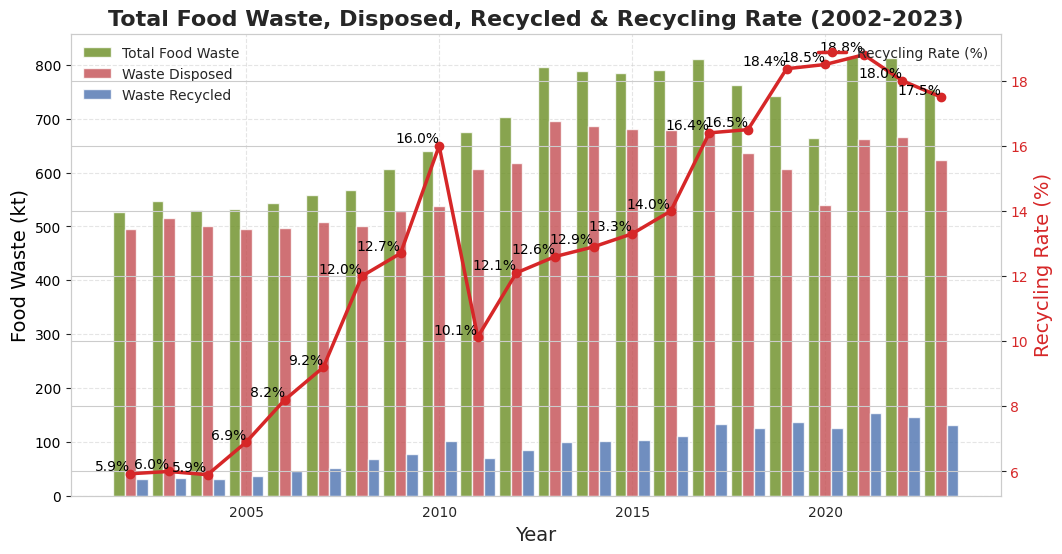

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define muted color palette
total_color = "#6b8e23"  # Olive green for total waste
disposed_color = "#c44e52"  # Muted red for disposed waste
recycled_color = "#4c72b0"  # Soft blue for recycled waste
recycle_rate_color = "#d62728"  # **Red for recycling rate line**
text_color = "black"  # **Black text for recycling rate values**

# Bar Width for Grouped Bars
bar_width = 0.3
years = df['Year']

# Plot grouped bars for Total Waste, Disposed, and Recycled
ax1.bar(years - bar_width, df['Total Food Waste (kt)'], width=bar_width, color=total_color, label="Total Food Waste", alpha=0.8)
ax1.bar(years, df['Waste Food Disposed (kt)'], width=bar_width, color=disposed_color, label="Waste Disposed", alpha=0.8)
ax1.bar(years + bar_width, df['Total Food Waste Recycled (kt)'], width=bar_width, color=recycled_color, label="Waste Recycled", alpha=0.8)

# Labels for primary Y-axis
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Food Waste (kt)", fontsize=14, color="black")
ax1.tick_params(axis='y', labelcolor="black")

# Secondary Y-axis for Recycling Rate
ax2 = ax1.twinx()
ax2.set_ylabel("Recycling Rate (%)", fontsize=14, color=recycle_rate_color)

# Line plot for Recycling Rate (Red)
ax2.plot(years, df['Recycling Rate (%)'], marker='o', linestyle="-", linewidth=2.5, color=recycle_rate_color, label="Recycling Rate (%)")

# Show values at each point on the Recycling Rate line (Black text)
for x, y in zip(years, df['Recycling Rate (%)']):
    ax2.text(x, y, f"{y:.1f}%", color=text_color, fontsize=10, ha="right", va="bottom")

ax2.tick_params(axis='y', labelcolor=recycle_rate_color)

# Title & Legends
plt.title("Total Food Waste, Disposed, Recycled & Recycling Rate (2002-2023)", fontsize=16, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.5)

# Legends
ax1.legend(loc="upper left", frameon=False)
ax2.legend(loc="upper right", frameon=False)

plt.show()


Key Insights:

  - 2010 Recycling Rate Surge: Likely driven by the Singapore Green Plan 2012, improved recycling infrastructure, and targeted waste management policies.

  - High Waste Disposal Despite Recycling Growth: Even with increased recycling, waste disposal remains high, highlighting the need for waste reduction at the source.

  - COVID-19 Impact (2020): Waste levels dropped sharply but rebounded post-pandemic.

  - Recycling Alone Isn’t Enough: Rising waste levels suggest that infrastructure and policy improvements must be complemented with stronger waste prevention measures.

##### 2.3.2 Correlation Matrix

To understand the relationships between variables, we generate a correlation matrix. This helps us identify how strongly each feature is related to the target variable and to each other.

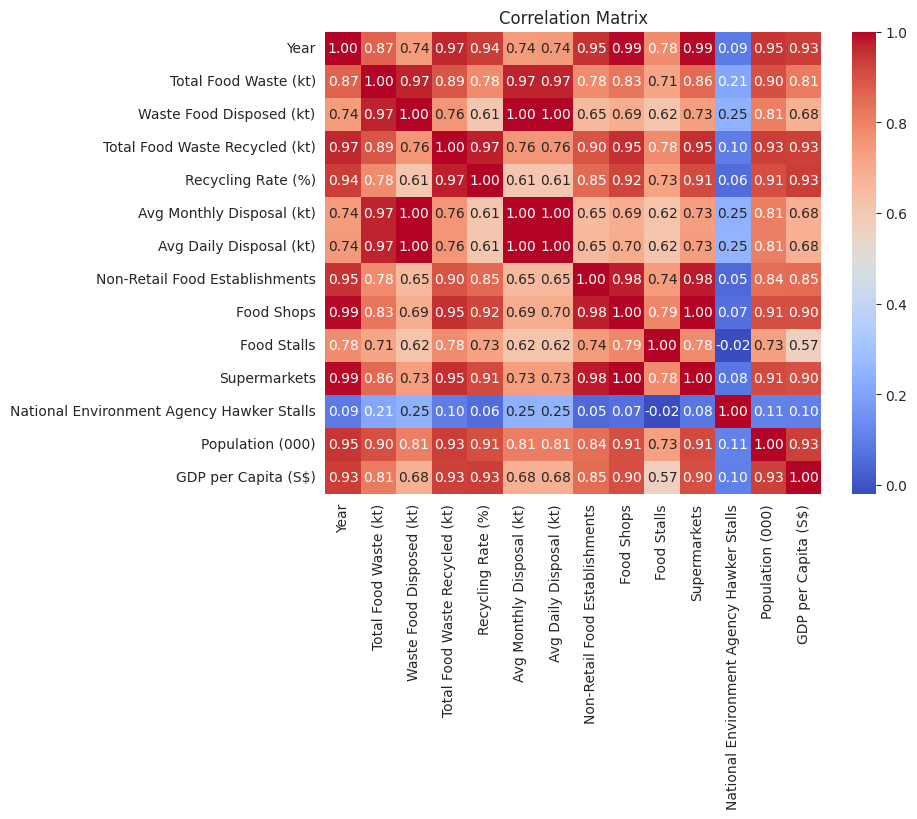

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


The correlation matrix reveals the following:

   - Total Food Waste (kt) has a strong positive correlation with Supermarkets (0.86) and GDP_per_Capita (0.81). This suggests that as the number of supermarkets and GDP per capita increase, the total food waste also increases.

   - Population also has a moderate positive correlation with Total Food Waste (kt) (0.90), indicating that food waste tends to increase as the population grows.

##### 2.3.3 Visualizing Relationships between Features and Target

We visualize the relationships between the target variable Total Food Waste (kt) and the features Population, Supermarkets, and GDP_per_Capita using scatter plots. These visualizations help identify any trends or patterns.

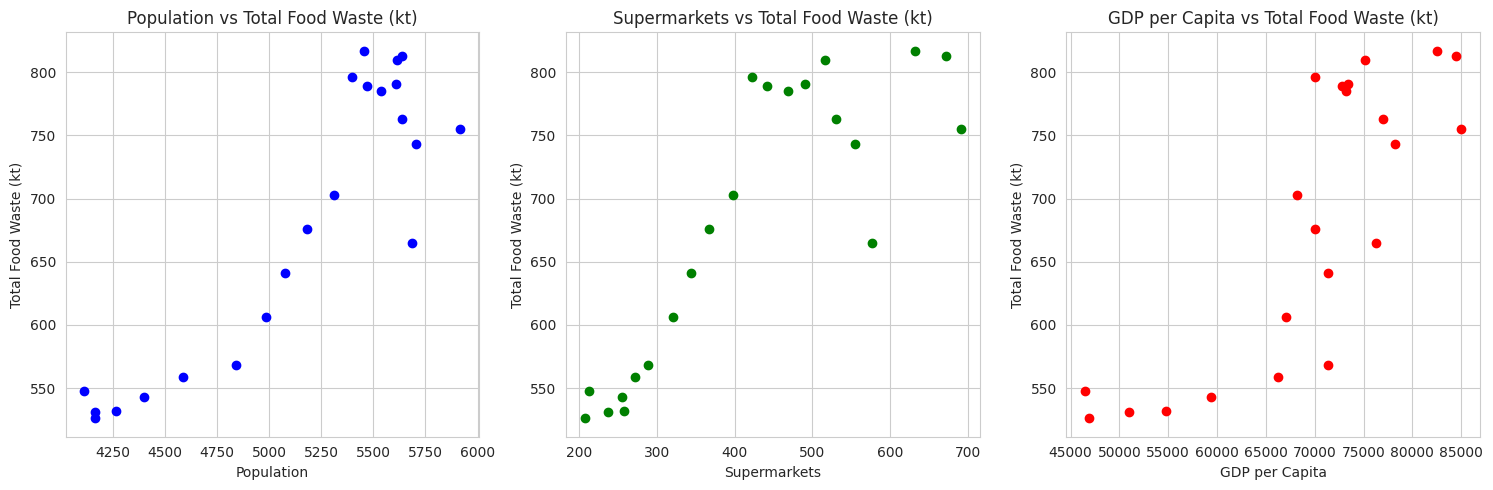

In [50]:
# Scatter plots for features vs Total Food Waste
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df["Population (000)"], df["Total Food Waste (kt)"], color='blue')
plt.title("Population vs Total Food Waste (kt)")
plt.xlabel("Population")
plt.ylabel("Total Food Waste (kt)")

plt.subplot(1, 3, 2)
plt.scatter(df["Supermarkets"], df["Total Food Waste (kt)"], color='green')
plt.title("Supermarkets vs Total Food Waste (kt)")
plt.xlabel("Supermarkets")
plt.ylabel("Total Food Waste (kt)")

plt.subplot(1, 3, 3)
plt.scatter(df["GDP per Capita (S$)"], df["Total Food Waste (kt)"], color='red')
plt.title("GDP per Capita vs Total Food Waste (kt)")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Food Waste (kt)")

plt.tight_layout()
plt.show()


These scatter plots reveal:

   - A positive correlation between Total Food Waste (kt) and Population, Supermarkets, and GDP_per_Capita.

   - The relationship appears to be linear, which is useful as linear models (like Linear Regression) will likely perform well.

### 3. Data Preparation

#### 3.1 Features and Target Variable

We define the features (X) and target (y) variables. The target variable is the "Total Food Waste (kt)", and the features include "Population", "Supermarkets", and "GDP_per_Capita".

In [51]:
# Prepare data
X = df[["Population (000)", "Supermarkets", "GDP per Capita (S$)"]]
y = df["Total Food Waste (kt)"]


#### 3.2 Polynomial Features

Polynomial features of degree 2 are applied to capture interactions between the features. This helps the model learn more complex relationships between the features and the target variable.

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


#### 3.3 Train-Test Split

The dataset is split into 80% training and 20% testing data. This allows us to train the models on one subset of the data and evaluate them on a separate subset to check their generalization ability.

In [53]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


#### 3.4 Feature Scaling

To ensure all features are on the same scale and improve the performance of certain models (like SVM and KNN), we apply StandardScaler to scale the features.

In [54]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 4. Model Initialization

We initialize 09 different machine learning models, including tree-based, regression, and neural network algorithms. These models are chosen to evaluate a variety of approaches to predict total food waste.

In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Initialize models with tuning
models = {
    "Random Forest": RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=150, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), alpha=0.01, learning_rate_init=0.01, max_iter=1000, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.7, max_iter=5000, random_state=42)
}


### 5. Model Training and Evaluation

Each model is trained using the training data (X_train, y_train) and evaluated using the test data (X_test). We calculate R² Score and Mean Squared Error (MSE) for each model to assess its performance.

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"R^2 Score": r2, "MSE": mse}

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T

# Sort the results by R² Score (descending) and MSE (ascending)
sorted_results_df = results_df.sort_values(by=["R^2 Score", "MSE"], ascending=[False, True])

# Print the sorted results
#print(sorted_results_df)


### 6. Model Evaluation Results

Below is a summary of the R² Scores and MSE for each model:

In [57]:
# Print the sorted results
print(sorted_results_df)

                   R^2 Score          MSE
Gradient Boosting   0.984777   209.969589
Random Forest       0.974447   352.454338
XGBoost             0.972220   383.172272
KNN                 0.958616   570.822222
SVR                 0.952283   658.171303
Neural Network      0.940804   816.505578
ElasticNet          0.900151  1377.237504
Bayesian Ridge      0.870461  1786.753825
Linear Regression   0.753200  3404.162133


Analysis of Results
- Gradient Boosting shows the highest R² Score (0.9848) and the lowest MSE (209.97), making it the top performer.
- Random Forest and XGBoost also performed very well, with R² Scores of 0.9744 and 0.9722, respectively, and MSE values of 352.45 and 383.17.